# Secure Multi Party Computation (SMPC) - Session 7

***TODO***: Include quote from StarWars

In this session we cover: 
- Introduction to SMPC
- Security Guarantees
- Security Models
- Secret Sharing
- SMPC in PySyft
- Async Execution Model
- CeleryWorker Execution Pools
- GreenThreads
- Gevent
- Retriable Actions
- MPCTensor
- ShareTensor
- Addition Example
- Public and Private Operations
- Psedudo Random Generators
- Beaver Triples
- Private Multiplication
- Arithmetc <> Boolean Sharing
- Bit Decomposition
- Bit Injection
- Private Compare
- Malicious Security
- DP and SMPC
- Future Directions
- Alternatives
- Trial of Courage
- Brain Food
- Homework
- Bonus Materials

## Motivations

As we discussed in the very first session, there are a number of issues that arise from the nature of how `data` is collected and used today which create `barriers` to higher `productivity`, `efficiency` and `utility` from the existing data we already have.

While previous sessions have focused on how we can protect individuals `Output Privacy` by placing access at a distance and adding carefully crafted noise to results to prevent data leakage, there are a number of use cases which pose more issues that require solving.

While keeping the `Data Scientist` at a distance prevents them from `copying` the data, what happens when `Data Owners` and `Data Scientists` want to work across multiple private datasets in a `Federated Learning` scenario?

Do we just copy the data to a central server? Who owns that server and can we trust them not to copy the data?

What about the results? Who controls and arbitrates the `Shared Governance` of results calculated on inputs from different organizations?

We have also made a lot of assumptions about the idea that the thing to be protected is `Data` and not a `Model`, but a model can also be expressed as data. Consider the weights of a Neural Network which are both data and a model and just like personal data the possibility of being able to utilize a model while also protecting it from leaking creates a lot of value and usecases.

What if the data or model we want to protect is not already inside the `domain` where we want to use it? If the `Data Owner` or `Model Owner` is outside a `domain` then sending in their valuable numbers to someone who controls the server and its RAM or Hard Disks poses some potential trust issues.

We have identified previously that there are several solutions to these problems in the form of PETs (Privacy Enhancing Technologies) which involve a variety of `encryption` or `protection` schemes. In the case of `encryption` the key to this working is the ability to provide algorithms which provide encrypted data which can still be computed on.

This notebook will cover aspects of one such solution called `Secure Multi-Party Computation` (SMPC).

## Introduction to SMPC

Secure Mutli-party Computation(SMPC) allows parties `P1, . . . , Pn` be a set of parties, with private inputs` x1, . . . , xn` jointly compute a function `f(x1, . . . , xn)`.

Such that the following condition holds:
- **Correctness**: The output is consistent with f and the inputs xi
- **Privacy**: Nothing about the private inputs is revealed beyond whatever information is contained in the public output.

In [ ]:
#TODO: include image showing picture of multiparty computation

In [ ]:
# Section: Motivations for SMPC , example scenarios

## Secret Sharing

Secret Sharing is one of the primitives required for smpc , lets view secret sharing through an use case scenario.

**Problem** : In many cases when all the sensitive data is stored in a isolated location it might account for a single point of failure.
Ex: 
- Nuclear Launch Codes
- Private Key Management

If we could split the shares shares such that , even if some of the locations are compromised it would not reveal the underlying secret.


Secret Sharing consists of two phases:
- Sharing
- Reconstruction

In the sharing phase , a trusted `Dealer` splits original secret `s` into `n` shares, where the `n` denotes the parties participating in the computation. 

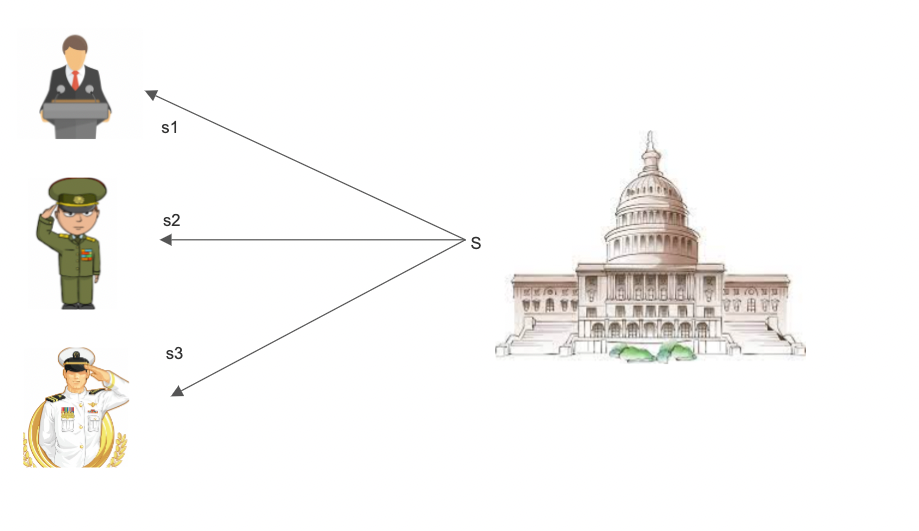

In the Reconstruction Phase the parties combine their original shares to get the original secret

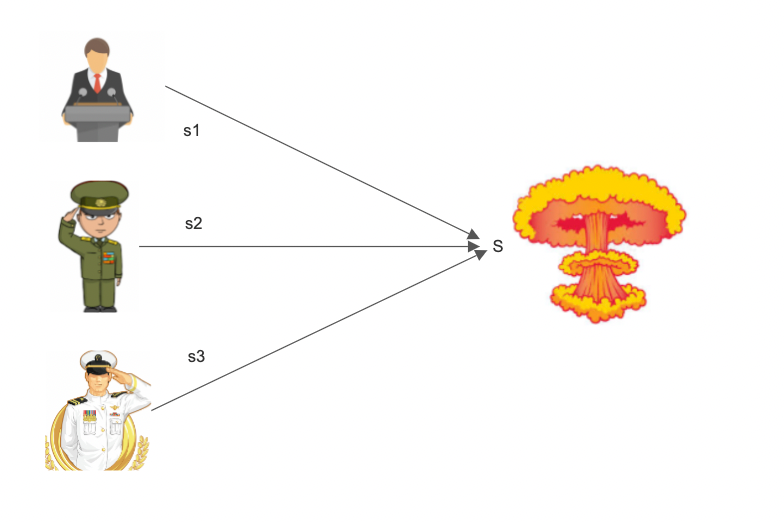

### Additive Secret Sharing

Additive Secret Sharing is an n-out-of-n secret sharing where all the shares are required to reconstuct the original secret.

The shares are defined over a finite space, assume we define our share over finite space  `Z`

In the above picture of nuclear launch codes the secret `S` is split into three parts  `s1`,`s2`,`s3` such that the  sum equals the secret
`S = (s1+s2+s3) mod Z`

All the shares are required to construct the original secret

There are other secret sharing schemes like `Threshold Secret Sharing` which allow us to reconstruct the secret only if a subset of the shares are present

In [4]:
#TODO: Leave reference for threshold secret sharing.

## SMPC Boolean Circuit Example

Lets take a toy example where two parties `Alice` and `Bob` each  have two private bits `a,a'` and `b,b'` and would like to compute a function `ab(a'+b')`

In this Example , consider all inputs as `bits`

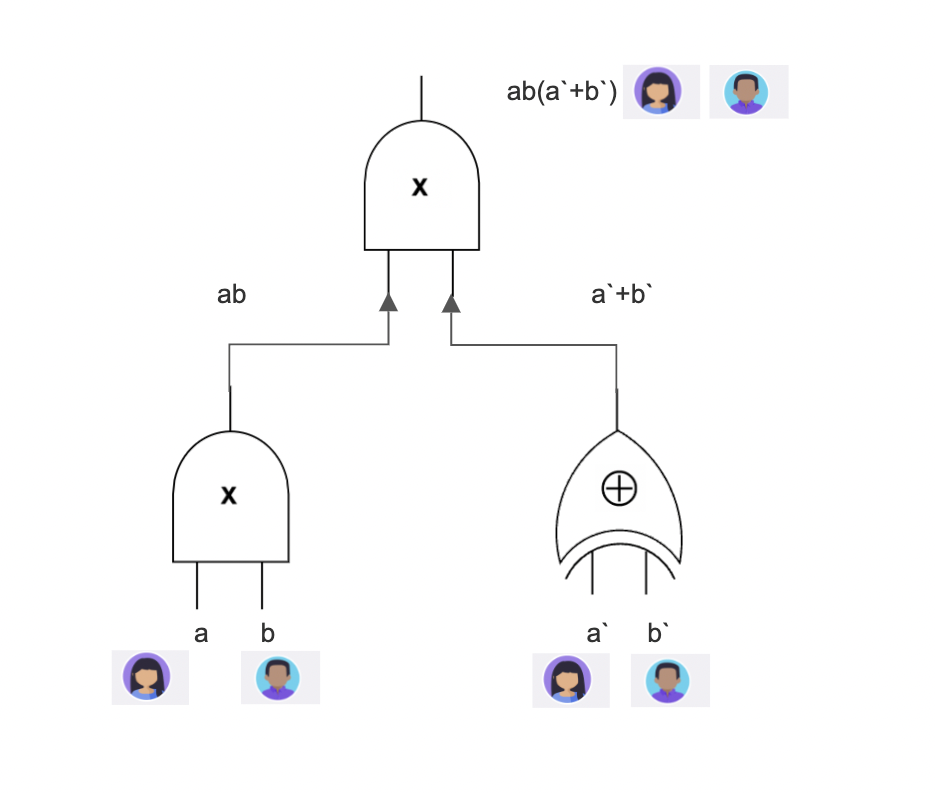

Let's break down the problem see how we could compute the basic gates.

We have to two basic gates in the computation:
- XOR Gate
- AND Gate

### XOR Gate

Consider two parties, Alice and Bob having private inputs/shares of private inputs a and b, would like to compute a⊕b 

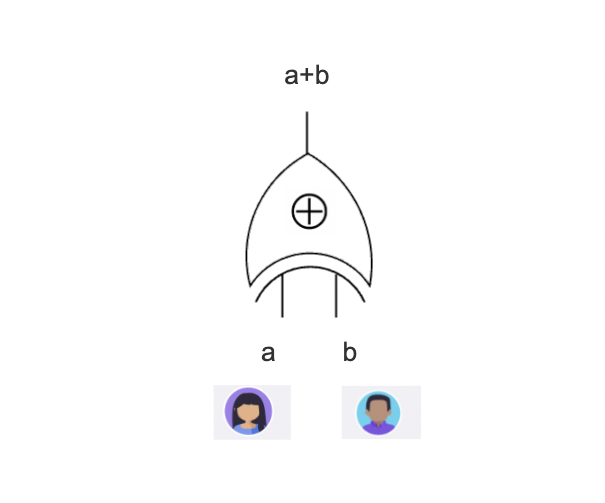

Let us ideate this problem from a `secret sharing` scenario, in this particular example both Alice and Bob own the private inputs, in many cases the private inputs are not owned by the parties computing the function

External stakeholders might delegate Alice and Bob to do the computation

Assume there are two stakeholder `S1` and `S2` having private inputs would like to compute XOR by secure computation.

The Stakeholders do not want Alice and Bob to know the private values,hence they secret share the private inputs between Alice and Bob.

In the Sharing Phase , 
The Stakeholders share their corresponding private inputs

They generate random bit `r` independently and construct the Shares as

S1 constructs shares α ,β

α  = (a⊕r1) <br>
β =  r1 <br> 
such that  α⊕β = a

### TODO replace with nice equation diagram, they do not look good.

In a Similar Way S2 constructs shares α',β'

α'  = (b⊕r2) <br>
β' =  r2 <br> 
such that  α'⊕β' = b

The stakeholders give the shares α,α' to Alice and β,β' to Bob

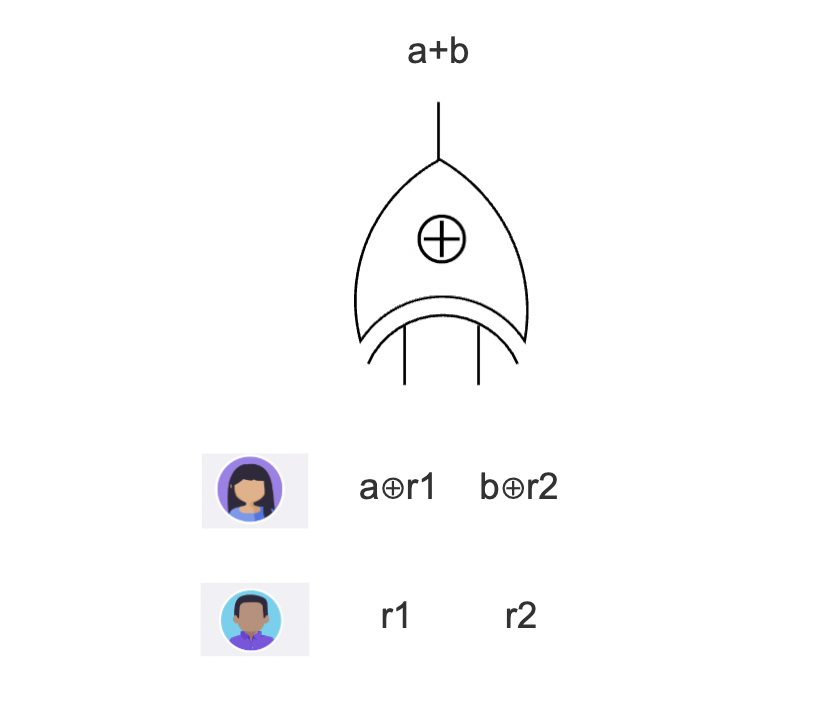

Now Both Alice and Bob have secret shared input to each of the input wires.

The important point is that the bits that Alice and bob see are random, through which they do not know the original private inputs

To compute XOR in secret shared manner, they locally xor the shares of each wire.

Alice xor's the shares α,α' as γ(gamma) <br>
γ = α ⊕ α'

Bob xor's the shares β,β' as δ(delta) <br>
δ = β⊕β'

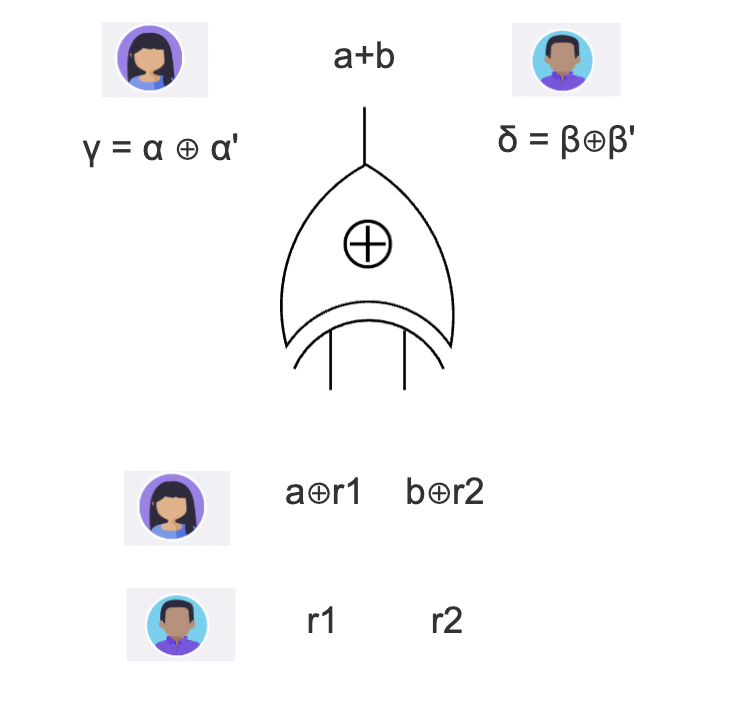

The values γ,δ are the final output shares.


Our claim is that reconstruction of the output shares would be the xor of private inputs a,b

Reconstruction of output shares: <br>
γ ⊕ δ = (α ⊕ α')⊕( β ⊕ β') <br>
Using Associativity property of xor and rearranging the equations.<br>
γ ⊕ δ = (α ⊕ β)⊕ ( α'⊕ β') <br>
γ ⊕ δ = a⊕b


During the computation, Alice and Bob see only random bits  held by them and perform the protocol.

During the reconstruction of the shares we obtain the xor function of the private inputs.

Alice  and Bob either send each of their shares to the stakeholder for them to reconstruct individually or they <br>
send it between themselves and make it a public output.

Let's take look at the XOR table

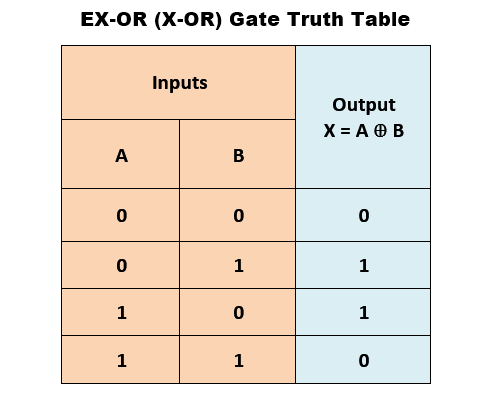

If two parties want to compute XOR securely , the table represents the inputs and outputs possible.

In XOR function, each party along with its's private input and output, could figure out the private input of the other party.

Does  the former protocol described above does not compute the xor function securely?

The SMPC security gurantees states that the adversary/maliciouis party could learn information from its private input and public output , but not beyond that

Since the XOR function itself ,reveals the private input, it is not a security Leakage

It seems that Secure Function Evaluation is not needed for XOR for single gate.

Each party exchaning the bits would suffice to compute xor

But the Secret Shared way of computing would allows us to compute example circuit above

## AND GATE

Consider two parties, Alice and Bob having private inputs/shares of private inputs a and b, would like to compute ab

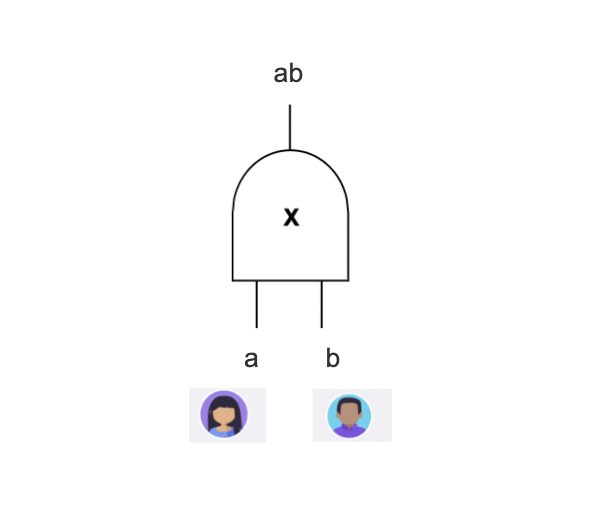

Let us ideate on the StakeHolder Scenario described above

In the Sharing Phase, the stakeholders creates shares as the above xor scenario

S1 choose a random bit r1 and constructs shares α,β as follows

α  = (a⊕r1) <br>
β =  r1 <br> 
such that  α⊕β = a


S2 chooses a random bit r2 and constructs shares α',β' as follows

α'  = (b⊕r2) <br>
β' =  r2 <br> 
such that  α'⊕β' = b

The stakeholders give the shares α,α' to Alice and β,β' to Bob

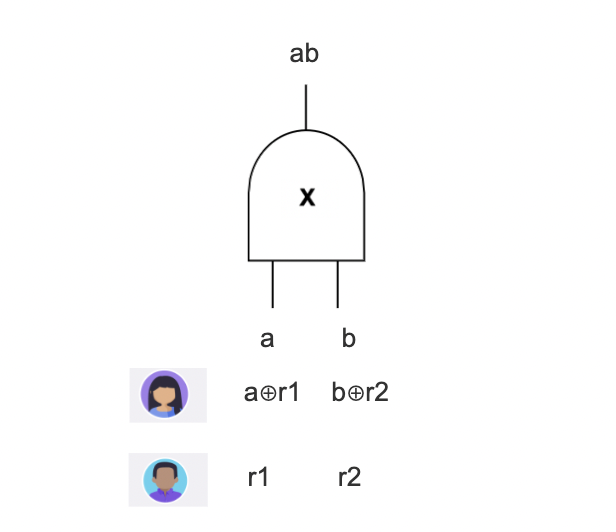

Now we are to compute AND in secret shared manner

In the XOR scenario , it was trivial, locally adding the shares would give us secret shares of the result

How do we Compute the AND gate in a secret shared manner?

For computing Secret Shared AND we use random `Beaver Triple` or an AND triple

Beaver Triple is tuple of three values (x,y,z)

x,y are picked uniformly at random.

The value z is the `and` operation between the bits x,y <br>
`z = xy`

```python
import secrets
def generate_binary_beaver_triple():
    x = secrets.randbits(1)
    y = secrets.randbits(1)
    z = x&y
    return (x,y,z)
```

In Simple case, lets asssume that we get the beaver triple from a `Trusted Third Party (TTP)`

The `Trusted Third Party(TTP)` creates shares of each value of the tuple and shares it with the parties

`Sharing of x`: <br>
TTP choose a random bit `r1` and the constructs the shares x<sub>a</sub> and x<sub>b</sub> as follows

x<sub>a</sub> = x ⊕ r1 <br>
x<sub>b</sub> = r1

`Sharing of y`: <br>
TTP chooses a random bit `r2` and constructs the shares y<sub>a</sub> and y<sub>b</sub> as follows

y<sub>a</sub> = y ⊕ r2 <br>
y<sub>b</sub> = r2

`Sharing of z`:<br>
TTP chooses a random bit `r3` and creates shares z<sub>a</sub> and z<sub>b</sub> as follows

z<sub>a</sub> = z ⊕ r3 <br>
z<sub>b</sub> = r3

TTP shares x<sub>a</sub>, y<sub>a</sub> , z<sub>a</sub> with `Alice` and  x<sub>b</sub>, y<sub>b</sub> , z<sub>b</sub> with `Bob`

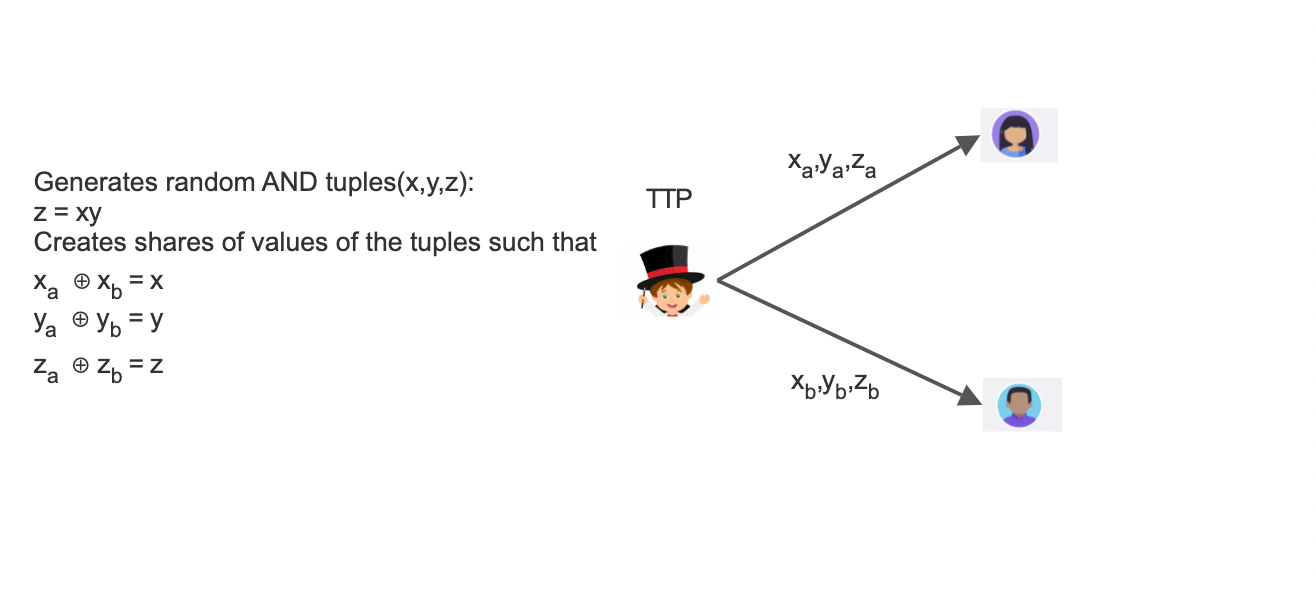

We could think of the beaver triple generation being done in the `pre-processing phase`, where the TTP generates lot of Beaver Triple beforehand and sends it to the parties in the computation.

After Beaver Triple Sharing Phase, the parties currently have the private inputs secrets shared and also the beaver triple secret shared

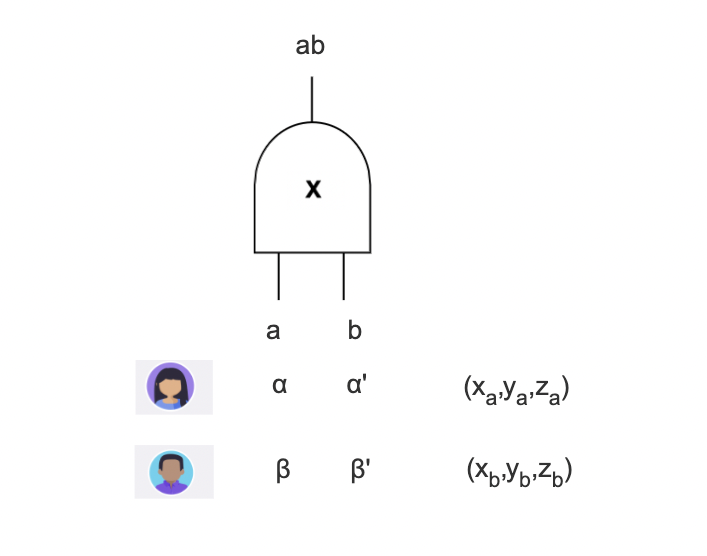

The Protocol proceeds as follows:

Alice computes

ε<sub>a</sub>  = α ⊕ x<sub>a</sub>  <br>
η<sub>a</sub>  = α'⊕ y<sub>a</sub>

Bob Computes

ε<sub>b</sub>  = β ⊕ x<sub>b</sub>  <br>
η<sub>b</sub>  = β'⊕ y<sub>b</sub>

The exchange the intermediate shares created ε and η

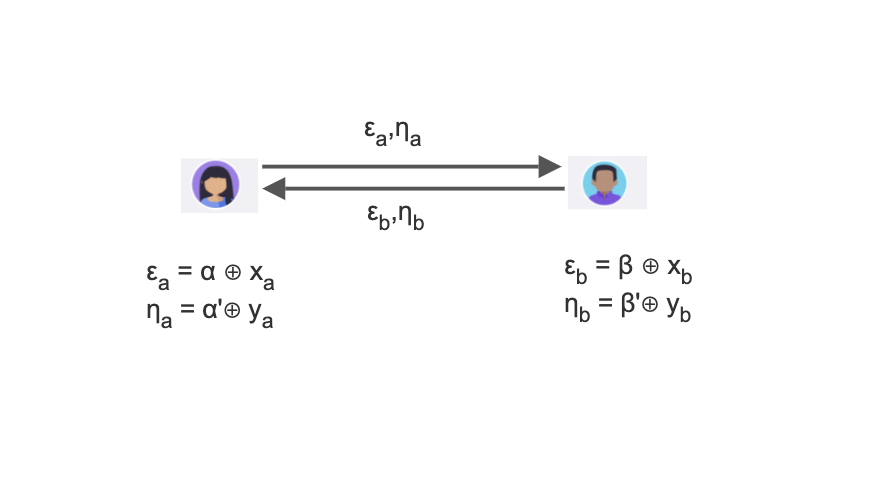

Since Alice,Bob have the shares required to reconstruct ε and η,they do  as follows

ε = ε<sub>a</sub> ⊕ ε<sub>b</sub> = (α ⊕ x<sub>a</sub>)⊕ (β ⊕ x<sub>b</sub> ) = (α ⊕  β)⊕ ( x<sub>a</sub> ⊕ x<sub>b</sub> ) <br>
ε = a ⊕ x


η = η<sub>a</sub> ⊕ η<sub>b</sub> = (α' ⊕ y<sub>a</sub>)⊕ (β' ⊕ y<sub>b</sub> ) = (α' ⊕  β')⊕ ( x<sub>a</sub> ⊕ x<sub>b</sub> ) <br>
η = b ⊕ y

Does this reconstruction constitute a security leak?

Since `x`,`y` were picked uniformly at randomly , we could think of the values `ε`,`η` masking the private inputs `a`,`b` with a random bit,hence it is not a security leak

With the shares ε , η they output the final shares γ , δ

Alice outputs:

γ = εα' ⊕ ηα ⊕ z<sub>a</sub> ⊕ εη

Bob outputs:

δ = εβ'  ⊕ ηβ ⊕ z<sub>b</sub>

Observe that the constant term is only added to alice's share

TODO: give reasoning on adding constant term to only party on secret sharing section

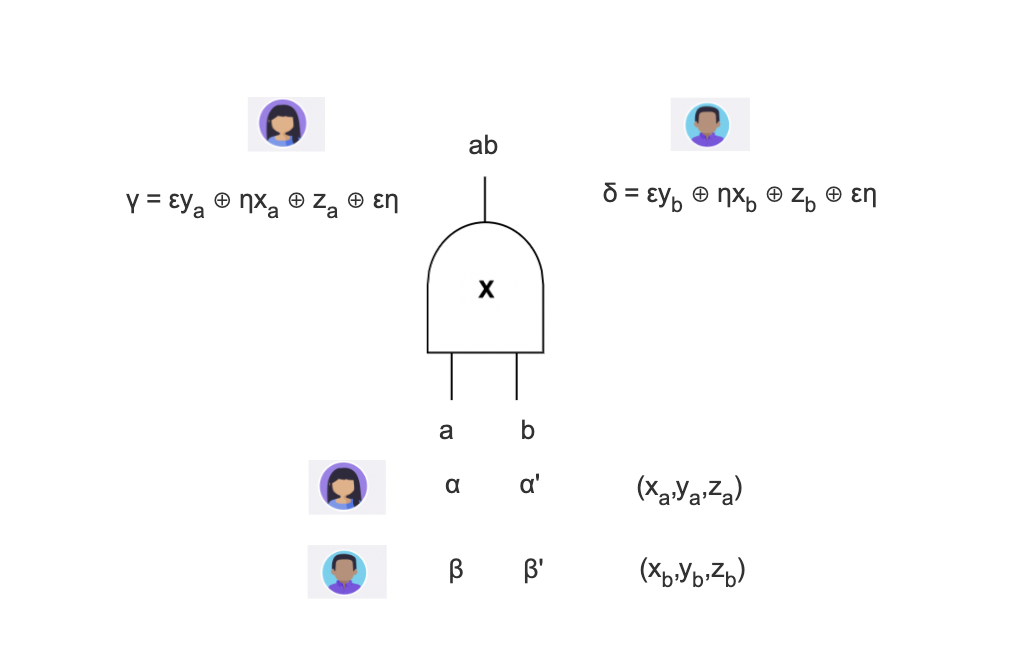

We claim the shares γ , δ are the secret shares of the output of the AND computation.

To prove it , lets `reconstruct` the final shares:

=> γ ⊕ δ <br>
=> (εα' ⊕ ηα ⊕ z<sub>a</sub> ⊕ εη) ⊕  (εβ'  ⊕ ηβ ⊕ z<sub>b</sub>) <br>
Using Associativity of XOR grouping common terms <br>
=> ε(y<sub>a</sub> ⊕ y<sub>b</sub>) ⊕ η(x<sub>a</sub> ⊕ x<sub>b</sub>) ⊕ (z<sub>a</sub> ⊕ z<sub>b</sub>) ⊕ εη  <br>
=> εy ⊕ ηx ⊕ z ⊕ εη   (Expading constant terms) <br>
=> (x ⊕ a)y ⊕ (y ⊕ b)x ⊕ z ⊕ (x⊕a)(y⊕b)  <br>
=> xy ⊕ ay ⊕ xy ⊕ bx ⊕ z ⊕ xy ⊕ bx ⊕ ay ⊕ ab (Grouping Common terms) <br> 
=> (xy ⊕ xy) ⊕ (bx ⊕ bx) ⊕ (z ⊕ xy)⊕ (ay ⊕ ay)  ⊕ ab <br>
=> ab ⊕ (z ⊕ xy) (since z= xy) <br>
=> ab ⊕ (xy ⊕ xy) <br>
=> ab <br>

Hence <br>
γ ⊕ δ = ab (which is the AND of the initial two private inputs a,b)

Alice  and Bob either send each of their shares to the stakeholder for them to reconstruct individually or they <br>
send it between themselves and make it a public output.

Let's take a look at the AND table to develop more inttuition on the `secure computation` solution

In [ ]:
# STRETCH: Make and table the same orange and green patter as the previous xor table

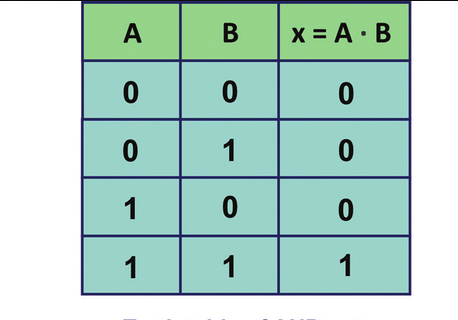

Similar like xor gate , we will try exploting the AND gate

### Explanation 1: Dating Problem

Let's think of the AND gate as Dating Problem. <br>
Two People `Alice`, `Bob` have a choice bit `b` on whether they want to go on a date with other. <br>
- The would go on a date if both of them consent (both choice bit is 1)
- They would not go an a date if any of only of them does not consent.


This essentially is computing AND on their `choice` bit.

They are interested in the output of the function but would not like to reveal their `input choice bit` as much as possible

Why do we mention `as much as possible`?

They are essentially trying to secure compute the AND function, but the output of the function in some cases reveals the choice bit of other person.

Assume Alice's input choice bit `b = 1`, and the output bit is `0` <br>
Alice could know that Bob's input bit was `0` hence she is embarrassed.

In the same case,as Bob input choice bit `b = 0` <br>
Bob could not determine the input bit of Alice.

Essentially apart from the information they could get from their own input bit and the output of the function <br>
Secure Computation guaratees that no other information is leaked.

### Explnation 2: Theoretical

if Alice is `malicious` and would like to know the private input of Bob during computation of AND gate.

`Scenario 1`: <br>
Alice's input bit a = 1 <br>
The output of the bit of the AND gate is exactly the input bit of Bob.

Since , this is revealead by the function output itself, it is not a security leakage

`Scenario 2`: <br>
Alice input bit a = 0 <br>
Alice could not get guess the input bit of Bob from the ouput, as her bit essentialy cancels or masks the signal of Bob

Essentially apart from the information they could get from their own input bit and the output of the function <br>
Secure Computation guaratees that no other information is leaked.

#### TODO: Add a mind blown gif or some nice gif below here

###  Solving the Original Circuit Example 

Now we know , how to securely compute XOR and AND gates

Does this solve the original circuit problem?

Not quite, we tend to reveal the output of the function at the computation of each gate, this leaks the intermediate shares during the circuit computation,for this we maintain an invariant such that,

**Secret Sharing Invariant**:  For each wire of the circuit Alice and Bob each have a bit whose `XOR` is the value at the wire.

To put in other terms, the input shares to a gate are `secret-shared` and the output is also `secret-shared`,until we have computed the final gate, where we reconstruct the output

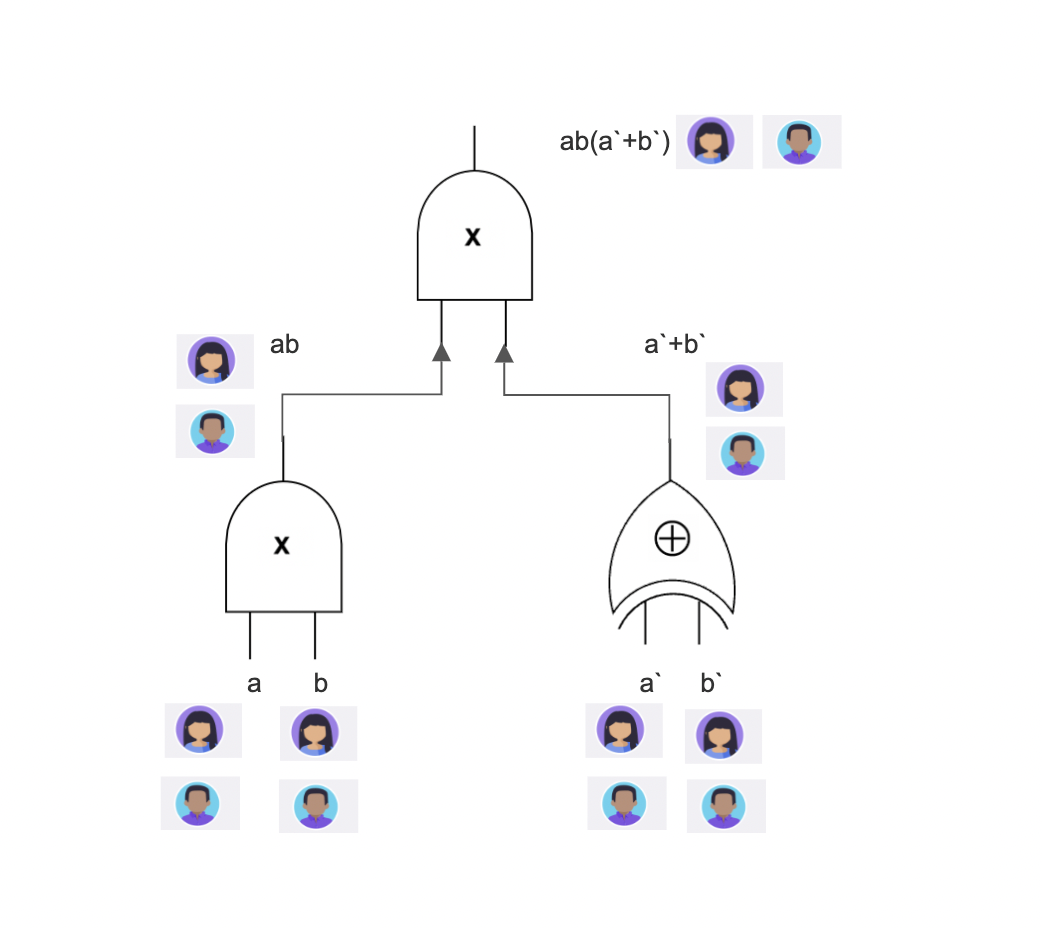

In each wire of the circuit in the above picture , the parties involved in the computation have a `shared-ownership` of that particular input to the wire.

This does not leak the `intermediate shares` , and we know how to compute XOR and AND on secret-shared values.

This is one of the reasons why we evaluate XOR gate through secret-sharing approach.

To summarize it ,we know how to compute
- Secret Shared XOR Gate
- Secret Shared AND Gate

By maintaing the secret sharing invariant , we move through each level of the circuit, only at the last level of the circuit we tend to do the `reconstruction`

## Computing Arbitrary Function

A natural next question would be:

- How do you solve a statistics problem using the world's data ?
- How do you solve implement an complex  ML algorithm ?
- Can we use it to implement any algorithm? <br>
... so on (TODO: Add more questions)

For us <br>
`Programs` ==> `Functions` ==> `Boolean`/`Arithmetic` Circuits

The gates XOR and AND gates are Turing Complete, by which we could use it to compose any function containly only `XOR` and `AND` gates.

In [23]:
# Include programs,functions,circuits image

In [24]:
#include a gif for mind blown

## Security Models

Until now we have not mentioned the power/capability of the adversaries in the computation

We could classify the adversaries in to three categories:

1. ***Semi-honest***: <br>
    <pre>The adversaries in this model follow the protocol specification exactly , they do not deviate from the protocol,
   However , they try to learn information from the transcript of the messages communicated in the protocol.
   A protocol with this level of security guarantees that there is not inadvertent data leakage.
   They are also called honest-but-curious or passive adversaries.
    </pre>
    

2. ***Malicious***:
    <pre>The adversaries in this model are allowed to arbitrarily deviate from the protocol.
   They could execute their own strategy during the computation.
   Ensuring this level of security , would prevent against any adversial attack.
   They are also called active adversaries.
    </pre>

3. ***Covert***:
    <pre>The adversaries in this model are allowed act maliciously.
   However, the security guarantee provided is that if it does attempt such an
   attack, then it will be detected with some specified probability that can be tuned to the application.
   It is applicable in real world applications, even if the adversary is caught, it would have some heavy penalty.
    </pre>

## Section 2: SMPC in PySyft

## Async Execution Model

In [ ]:
#Recap of how async messages are processed

## Celery worker Execution Pool

In [ ]:
#explanation of   solo, gevent ,eventlet, prefork

## GreenThreads

## Gevent

In [ ]:
#Explanation about how we context switch between actions using gevent.sleep(0)
#greenlets_switch.py
# the code which contains context switch.

##  Retriable Function (as an Alternate future direction

## Demo Code

In [15]:
#Launching two domain with a DS account to work on.

In [16]:
# Creating a small python example: (ex: multiplication) show the operation between domains
# a = private value on domain canada
# b = private value on domain italy
# result = a*b
#showing this example in the context of Pointer
#a = canada.syft.Tensor(np.array([5]))
#b = italy.syft.Tensor(np.array([7]))
#res = a*b
#request response to get the result

In [18]:
# This creates all the MPCtensor under the hood, 
#Q: should we explain the tensor and show the demo or demo then explain the concept

## MPC Tensor

In [ ]:
## Explanation about the MPC Tensor class which is the root of Tensor operations

## ShareTensor

In [ ]:
## Explanation about share tensor class and how it is used

## FixedPrecisionTensor

In [ ]:
## Explanation of need of FPT as the smpc algorithm works with FPT

## Tensor Chain (For SMPC only scenario)

In [ ]:
## Explanation of how all the above tensors are created.

## TensorPointer Abstraction 

In [ ]:
## Indepth code explanation on how does PySyft actually detect and creates MPC Tensor while multiplying tensor pointers
## We could could explain only the creation of MPCTensor part here , the protocol execution in the next section.

## MPCTensor Multiplication

In [ ]:
## Explain about how private multiplication is executed using the context from the previous toy example
# Trace the whole multiplication operation
  
    # MPCTensor level
    # Generating Beaver Triple
    # Share Tensor Level
    # Communication between the Parties
    # Beaver Intermediate Value
    


## Request and Response of Pointer

In [ ]:
# Explanation of how requests/response works in the codebase for TensorPointers.

## DP and SMPC

In [ ]:
# Give an high level intro to the DP and SMPC
# Ex: run a toy example to illustrate the same using context from DP notebook

## Future Directions in SMPC

## Brain Food

## Homework

## Bonus Materials